In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_train.shape

(891, 12)

In [4]:
titanic_test.shape

(418, 11)

In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

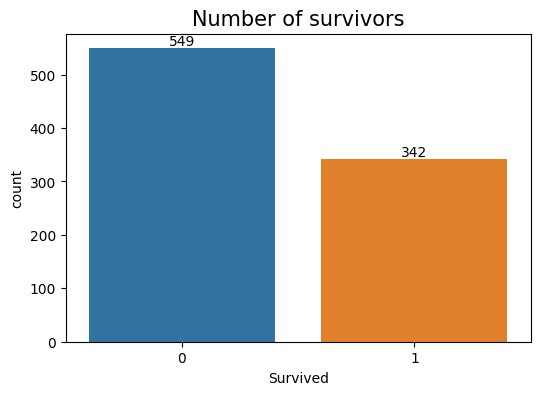

In [43]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Survived", order = titanic_train['Survived'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of survivors',fontsize = 15)
plt.show()

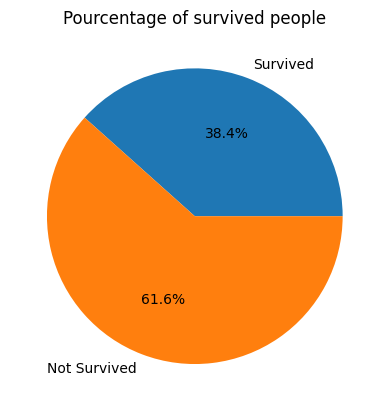

In [85]:
pourcentage = titanic_train['Survived'].value_counts()[1]/len(titanic)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["Survived", "Not Survived"], autopct='%1.1f%%')
plt.title('Pourcentage of survived people')
plt.show()

In [38]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

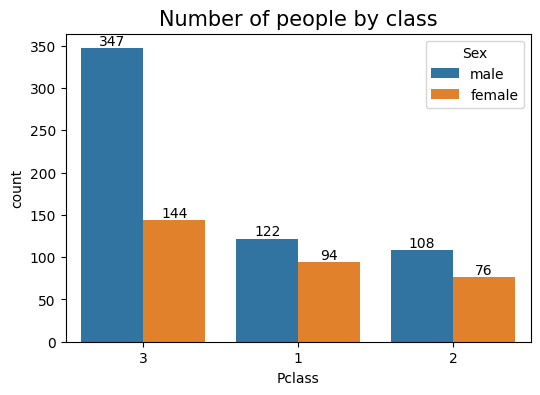

In [148]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Pclass",order = titanic_train['Pclass'].value_counts().index,hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people by class',fontsize = 15)
plt.show()

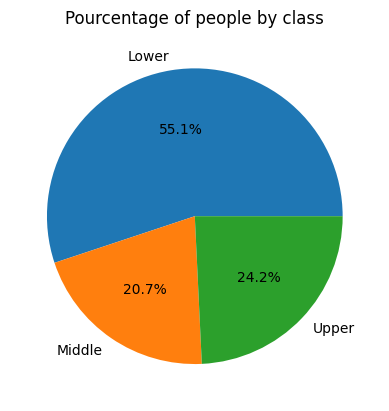

In [86]:
pourcentage_3 = titanic_train['Pclass'].value_counts()[3]/len(titanic)
pourcentage_2 = titanic_train['Pclass'].value_counts()[2]/len(titanic)
x = [pourcentage_3, pourcentage_2,1-pourcentage_3-pourcentage_2]
plt.pie(x, labels=["Lower", "Middle","Upper"], autopct='%1.1f%%')
plt.title('Pourcentage of people by class')
plt.show()

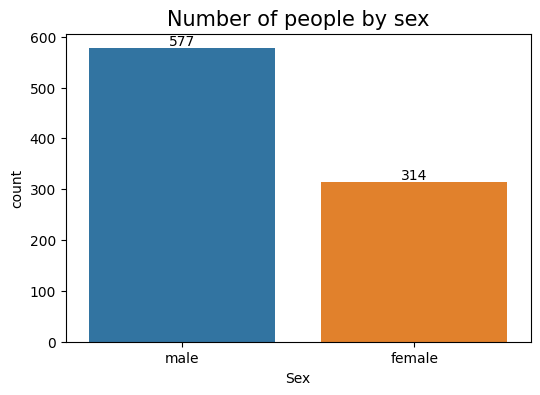

In [147]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Sex",order = titanic_train['Sex'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people by sex',fontsize = 15)
plt.show()

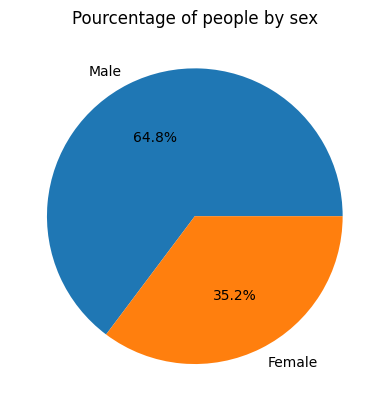

In [87]:
pourcentage = titanic_train['Sex'].value_counts()["male"]/len(titanic)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title('Pourcentage of people by sex')
plt.show()

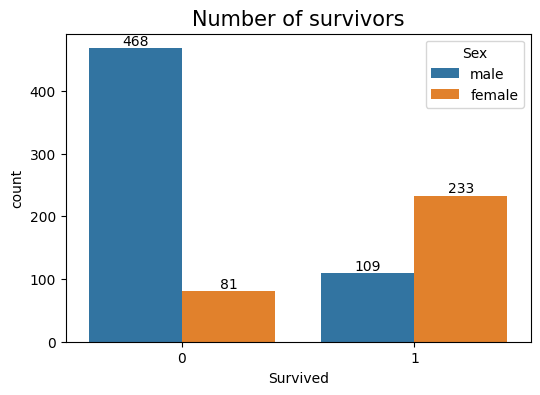

In [51]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Survived", order = titanic_train['Survived'].value_counts().index, hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of survivors',fontsize = 15)
plt.show()

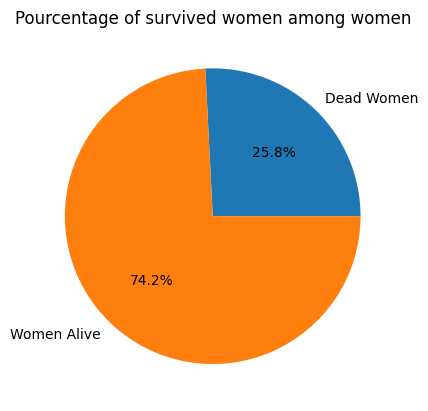

In [81]:
pourcentage = titanic_train.loc[(titanic_train['Survived']==0) & (titanic_train['Sex']=='female')].shape[0]\
                /len(titanic_train[titanic_train['Sex']=='female'])
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["Dead Women", "Women Alive"], autopct='%1.1f%%')
plt.title('Pourcentage of survived women among women')
plt.show()

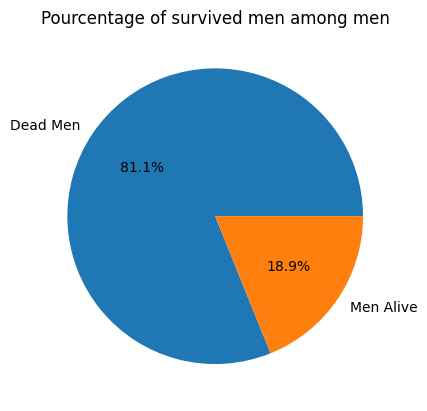

In [82]:
pourcentage = titanic_train.loc[(titanic_train['Survived']==0) & (titanic_train['Sex']=='male')].shape[0]\
                /len(titanic_train[titanic_train['Sex']=='male'])
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["Dead Men", "Men Alive"], autopct='%1.1f%%')
plt.title('Pourcentage of survived men among men')
plt.show()

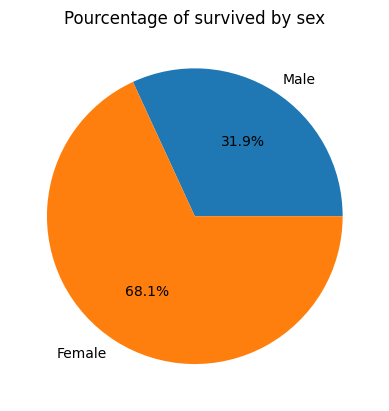

In [78]:
pourcentage = titanic_train.loc[(titanic_train['Survived']==1) & (titanic_train['Sex']=='male')].shape[0]\
                /len(titanic_train[titanic_train['Survived']==1])
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title('Pourcentage of survived by sex')
plt.show()

In [102]:
#Age max
titanic_train[titanic_train['Age']==titanic_train['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


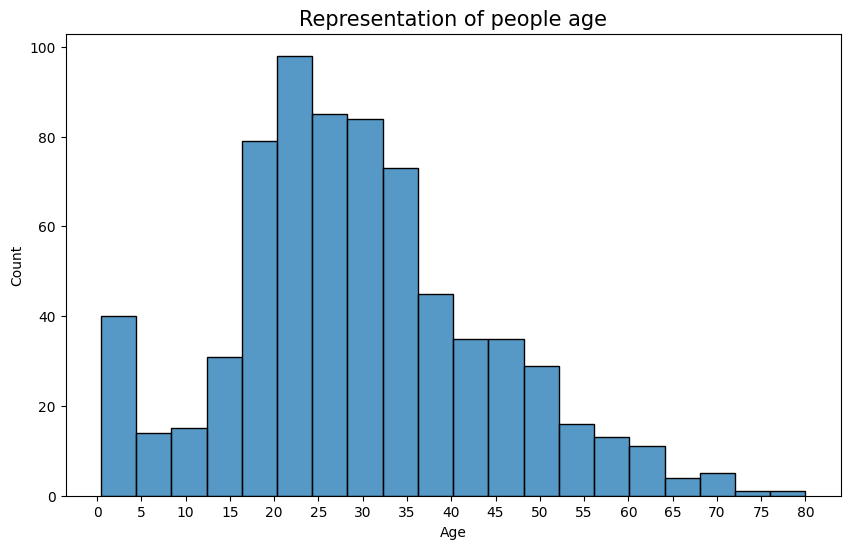

In [108]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic_train , x="Age")
plt.title('Representation of people age',fontsize=15)
plt.xticks(np.arange(0,81,step=5));

In [123]:
titanic_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

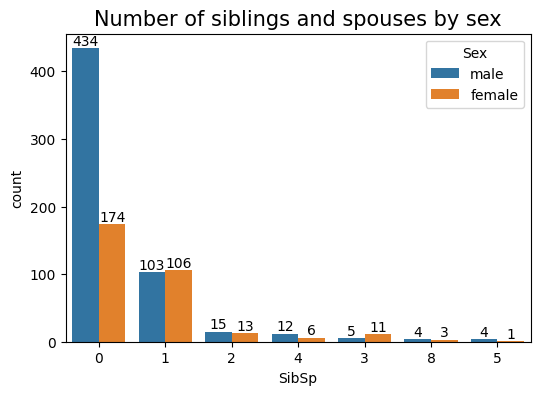

In [127]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="SibSp", order = titanic_train['SibSp'].value_counts().index, hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of siblings and spouses by sex',fontsize = 15)
plt.show()

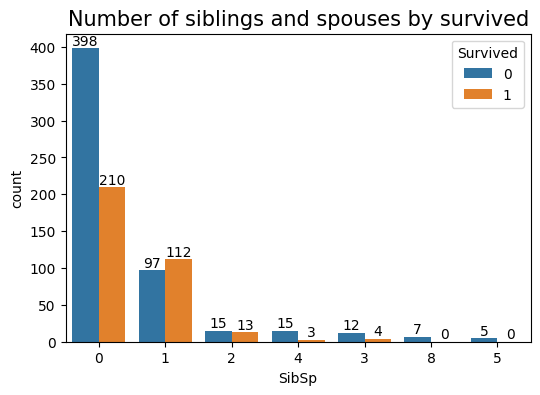

In [128]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="SibSp", order = titanic_train['SibSp'].value_counts().index, hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of siblings and spouses by survived',fontsize = 15)
plt.show()

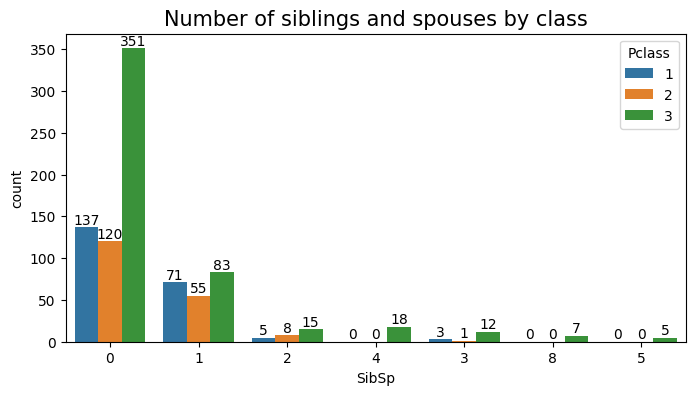

In [135]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=titanic_train , x="SibSp", order = titanic_train['SibSp'].value_counts().index, hue='Pclass')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of siblings and spouses by class',fontsize = 15)
plt.show()

In [131]:
titanic_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

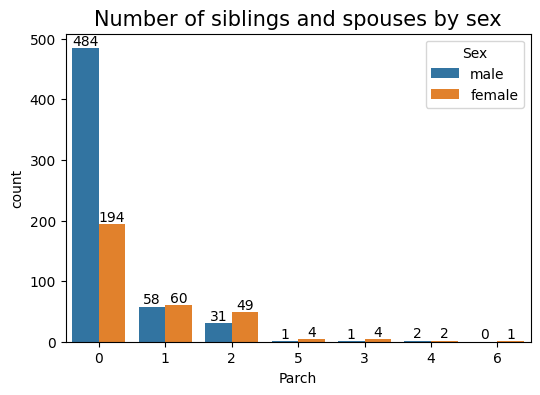

In [132]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Parch", order = titanic_train['Parch'].value_counts().index, hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of family relations by sex',fontsize = 15)
plt.show()

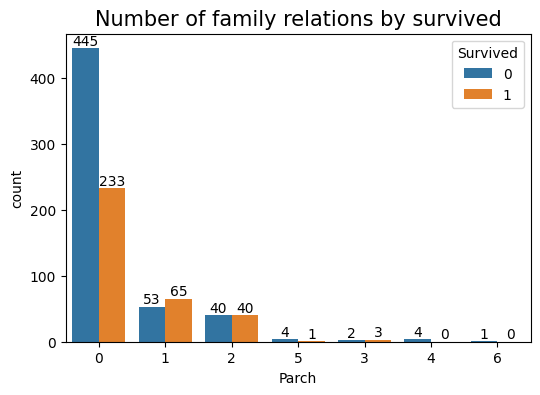

In [134]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Parch", order = titanic_train['Parch'].value_counts().index, hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of family relations by survived',fontsize = 15)
plt.show()

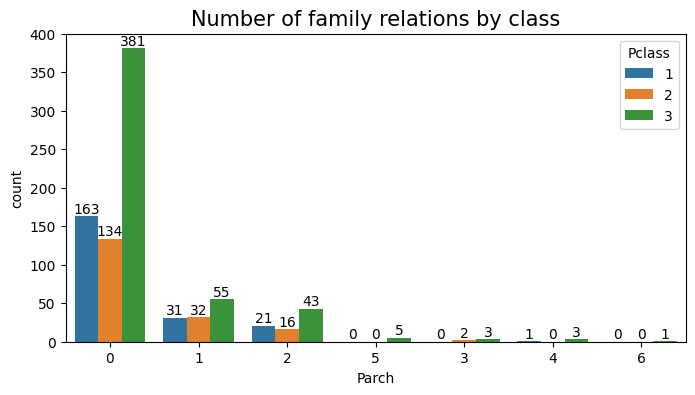

In [137]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=titanic_train , x="Parch", order = titanic_train['Parch'].value_counts().index, hue='Pclass')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of family relations by class',fontsize = 15)
plt.show()

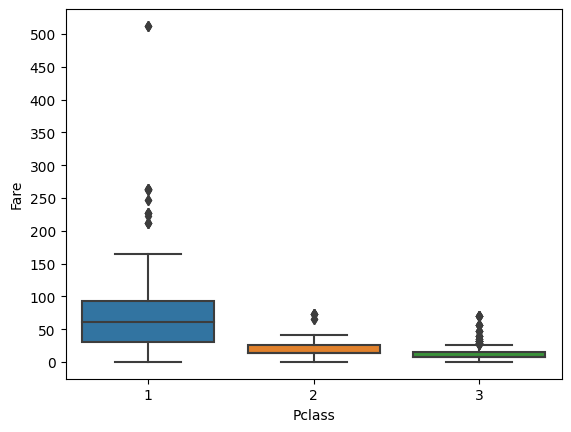

In [143]:
sns.boxplot(x=titanic_train['Pclass'], y=titanic_train['Fare'])
plt.yticks(np.arange(0,550,step=50));

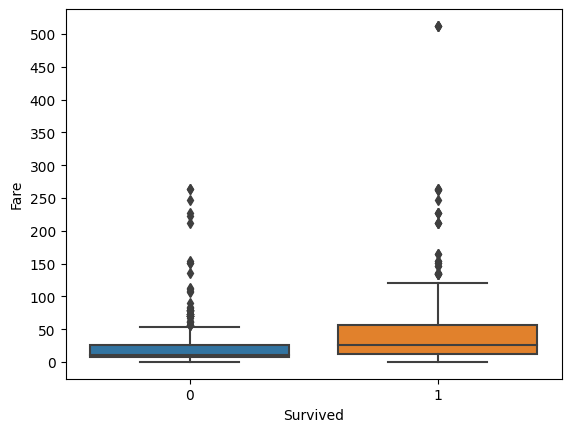

In [144]:
sns.boxplot(x=titanic_train['Survived'], y=titanic_train['Fare'])
plt.yticks(np.arange(0,550,step=50));

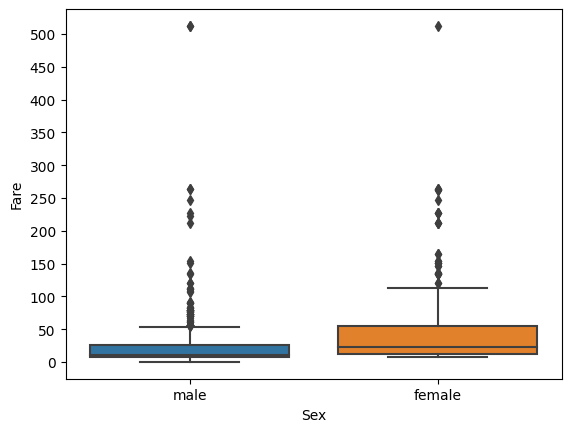

In [146]:
sns.boxplot(x=titanic_train['Sex'], y=titanic_train['Fare'])
plt.yticks(np.arange(0,550,step=50));

In [150]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

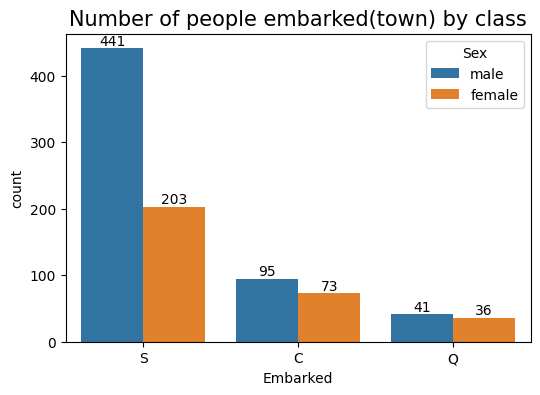

In [153]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Embarked",order = titanic_train['Embarked'].value_counts().index,hue='Sex')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people embarked(town) by class',fontsize = 15)
plt.show()

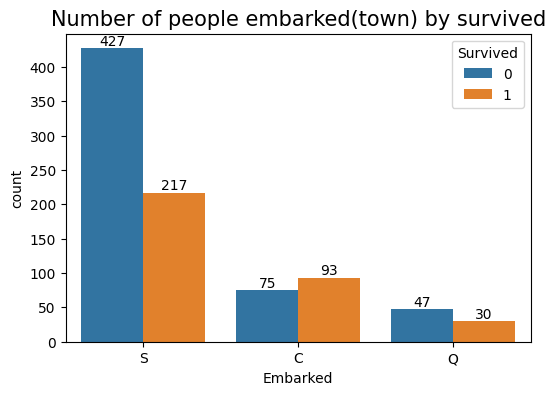

In [154]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=titanic_train , x="Embarked",order = titanic_train['Embarked'].value_counts().index,hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people embarked(town) by survived',fontsize = 15)
plt.show()

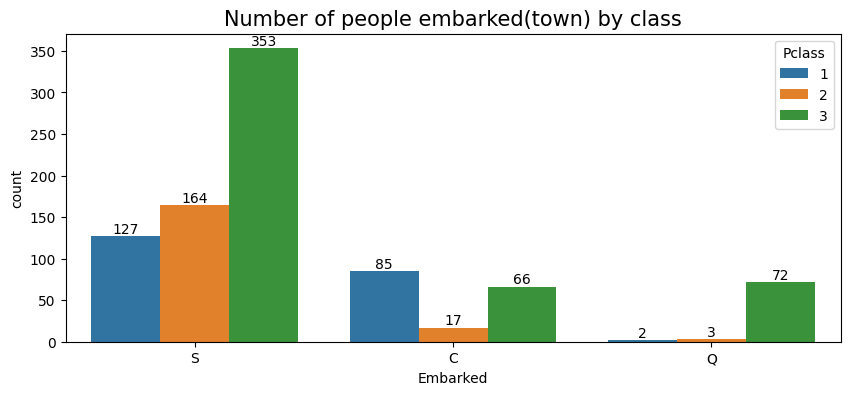

In [155]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=titanic_train , x="Embarked",order = titanic_train['Embarked'].value_counts().index,hue='Pclass')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people embarked(town) by class',fontsize = 15)
plt.show()

In [8]:
pearson = titanic_train.corr(method='pearson')
pearson

C:\Users\pierr\AppData\Local\Temp\ipykernel_6076\4287117351.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = titanic_train.corr(method='pearson')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


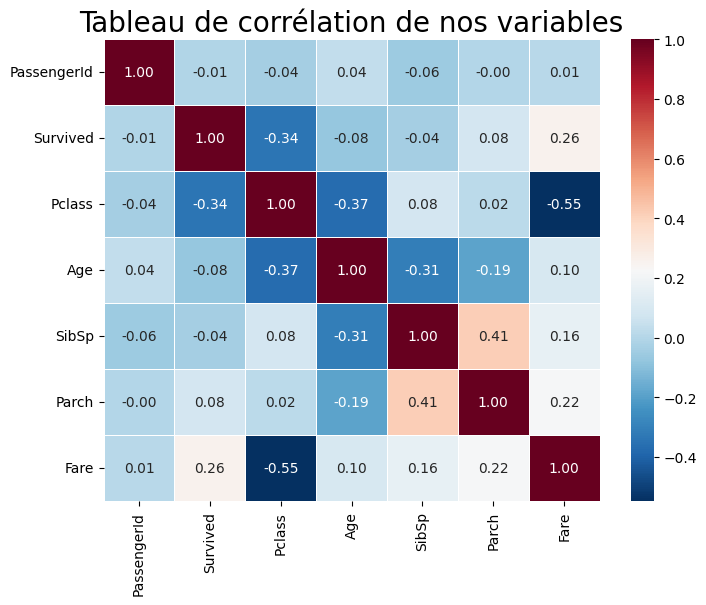

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
           fmt='.2f')

plt.title('Tableau de corrélation de nos variables',fontsize=20);

In [165]:
titanic_train[['Ticket','Embarked']].head(50)

,Ticket,Embarked
0,A/5 21171,S
1,PC 17599,C
2,STON/O2. 3101282,S
3,113803,S
4,373450,S
5,330877,Q
6,17463,S
7,349909,S
8,347742,S
9,237736,C


In [6]:
columns_deleted = ['Ticket','Cabin']

In [7]:
titanic_train.drop(columns = columns_deleted, inplace = True)
titanic_test.drop(columns = columns_deleted, inplace = True)

In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [11]:
# Filling the missing values in Embarked with S (most people)
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

In [12]:
titanic = pd.concat([titanic_train, titanic_test], sort=True).reset_index(drop=True)

In [13]:
titanic.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0


In [14]:
#Filling the missing values in Age (pclass more correlate with age)
titanic.groupby(['Sex', 'Pclass']).median()['Age']

C:\Users\pierr\AppData\Local\Temp\ipykernel_8780\869336831.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [15]:
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\pierr\AppData\Local\Temp\ipykernel_8780\3579505135.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [16]:
titanic.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [17]:
titanic.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]

7.8542

In [18]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
titanic['Fare'] = titanic['Fare'].fillna(titanic.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0])

In [19]:
titanic.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [20]:
cut = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
titanic['Age'] = pd.cut(titanic['Age'], bins=cut)

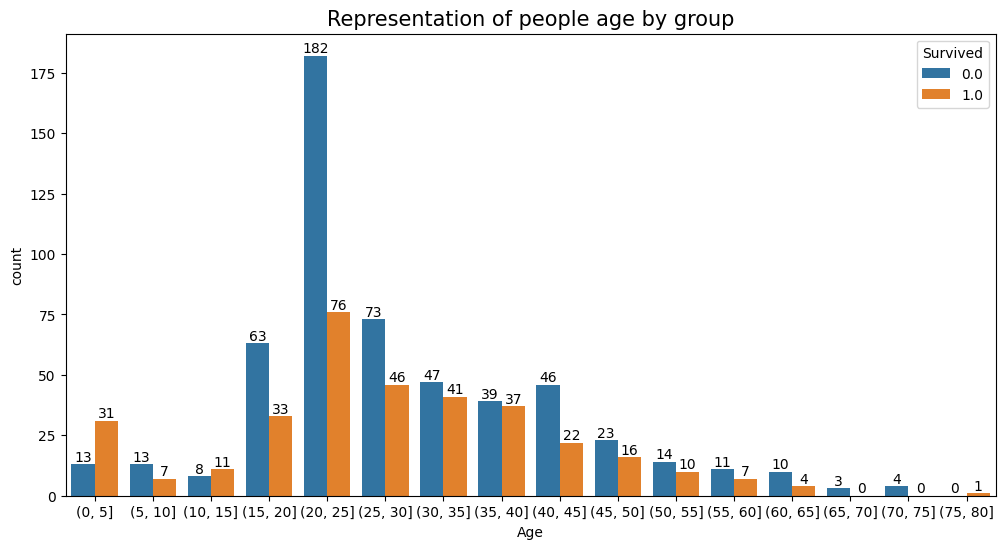

In [21]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=titanic , x="Age",hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Representation of people age by group',fontsize=15)
plt.show()


In [22]:
#create new variable
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [23]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium',
              7: 'Large', 8: 'Large', 9: 'Large', 10: 'Large', 11: 'Large'}
titanic['Family_Size_Grouped'] = titanic['Family_Size'].map(family_map)

In [24]:
titanic.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,Family_Size_Grouped
0,"(20, 25]",S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,2,Small
1,"(35, 40]",C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,2,Small
2,"(25, 30]",S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,1,Alone
3,"(30, 35]",S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,2,Small
4,"(30, 35]",S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,1,Alone


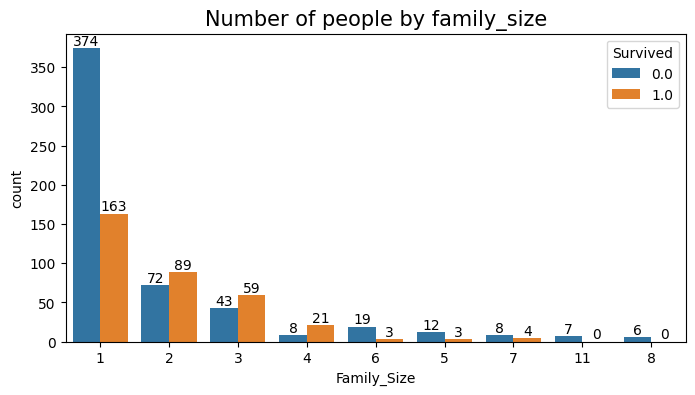

In [25]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=titanic , x="Family_Size",order = titanic['Family_Size'].value_counts().index,hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people by family_size',fontsize = 15)
plt.show()

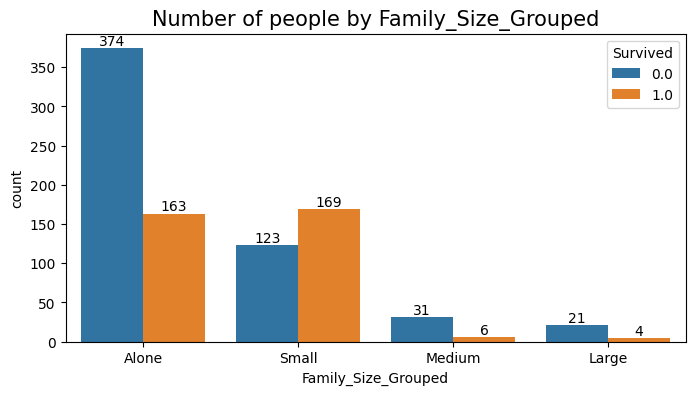

In [26]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=titanic , x="Family_Size_Grouped",order = titanic['Family_Size_Grouped'].value_counts().index,hue='Survived')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of people by Family_Size_Grouped',fontsize = 15)
plt.show()

In [27]:
titanic['Title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [28]:
titanic['Is_Married'] = 0
titanic['Is_Married'].loc[titanic['Title'] == 'Mrs'] = 1

C:\Users\pierr\AppData\Local\Temp\ipykernel_8780\2664193111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Is_Married'].loc[titanic['Title'] == 'Mrs'] = 1


In [29]:
titanic['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

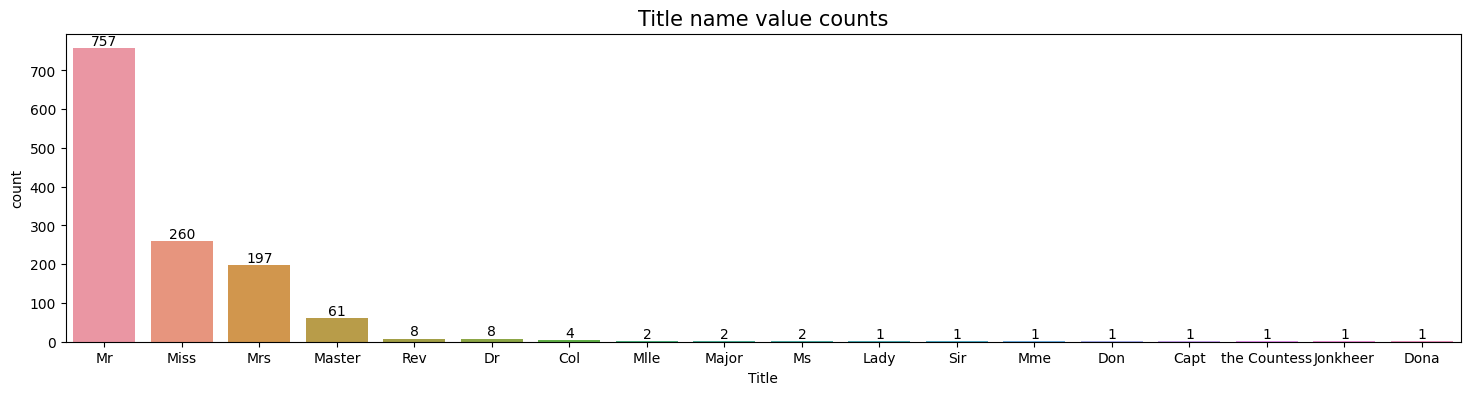

In [30]:
plt.figure(figsize=(18,4))
ax = sns.countplot(data=titanic , x="Title", order = titanic['Title'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Title name value counts',fontsize = 15)
plt.show()

In [31]:
titanic['Title'] = titanic['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic['Title'] = titanic['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

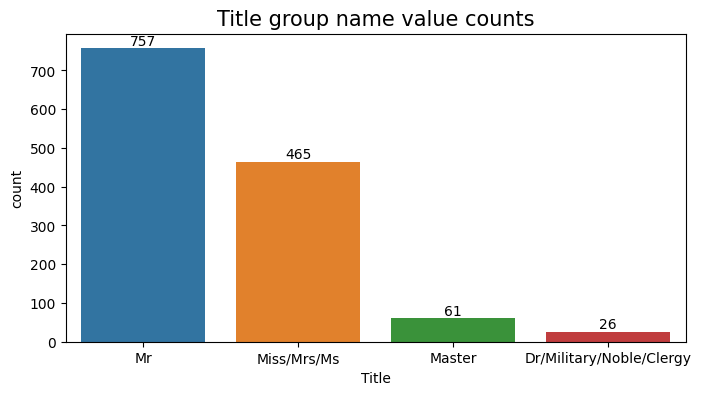

In [32]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=titanic , x="Title", order = titanic['Title'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Title group name value counts',fontsize = 15)
plt.show()

In [33]:
titanic.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,Family_Size_Grouped,Title,Is_Married
0,"(20, 25]",S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,2,Small,Mr,0
1,"(35, 40]",C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,2,Small,Miss/Mrs/Ms,1
2,"(25, 30]",S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,1,Alone,Miss/Mrs/Ms,0
3,"(30, 35]",S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,2,Small,Miss/Mrs/Ms,1
4,"(30, 35]",S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,1,Alone,Mr,0


In [34]:
titanic.drop(columns = ['Name'], inplace = True)

In [35]:
titanic.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,Family_Size_Grouped,Title,Is_Married
0,"(20, 25]",S,7.2500,0,1,3,male,1,0.0,2,Small,Mr,0
1,"(35, 40]",C,71.2833,0,2,1,female,1,1.0,2,Small,Miss/Mrs/Ms,1
2,"(25, 30]",S,7.9250,0,3,3,female,0,1.0,1,Alone,Miss/Mrs/Ms,0
3,"(30, 35]",S,53.1000,0,4,1,female,1,1.0,2,Small,Miss/Mrs/Ms,1
4,"(30, 35]",S,8.0500,0,5,3,male,0,0.0,1,Alone,Mr,0


In [36]:
titanic['Fare'] = pd.qcut(titanic['Fare'], 13)

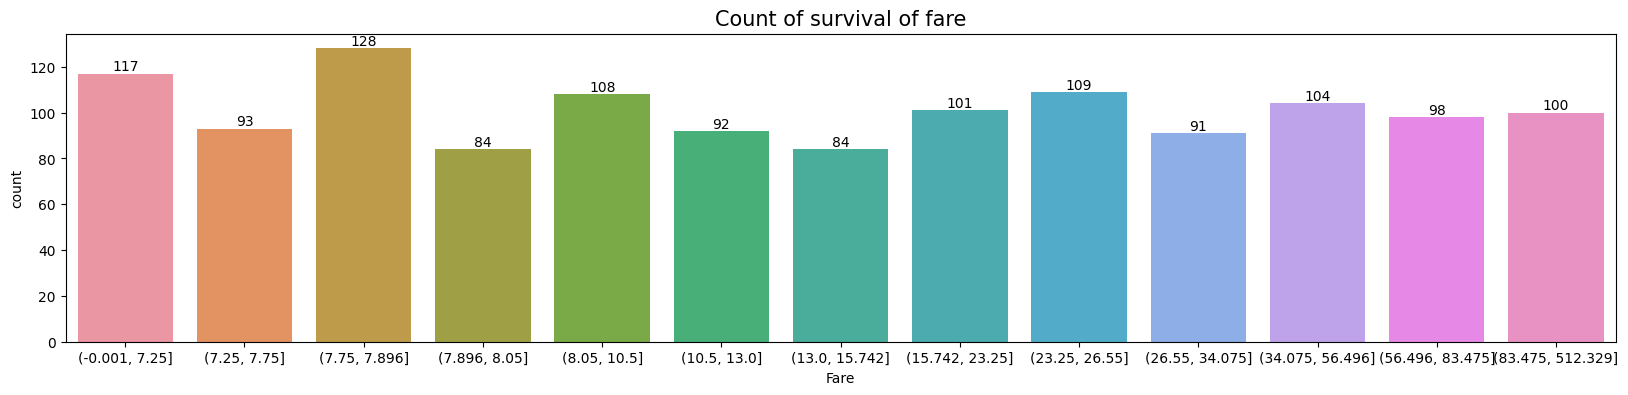

In [37]:
plt.figure(figsize=(20,4))
ax = sns.countplot(data=titanic , x="Fare")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of survival of fare',fontsize = 15)
plt.show()

In [38]:
titanic_train = titanic.loc[:890]
titanic_test = titanic.loc[891:].drop(['Survived'], axis=1)

In [39]:
titanic_test.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size,Family_Size_Grouped,Title,Is_Married
891,"(30, 35]",Q,"(7.75, 7.896]",0,892,3,male,0,1,Alone,Mr,0
892,"(45, 50]",S,"(-0.001, 7.25]",0,893,3,female,1,2,Small,Miss/Mrs/Ms,1
893,"(60, 65]",Q,"(8.05, 10.5]",0,894,2,male,0,1,Alone,Mr,0
894,"(25, 30]",S,"(8.05, 10.5]",0,895,3,male,0,1,Alone,Mr,0
895,"(20, 25]",S,"(10.5, 13.0]",1,896,3,female,1,3,Small,Miss/Mrs/Ms,1


In [40]:
titanic_test.to_csv('titanic_test_details.csv')

In [35]:
titanic_train.isnull().sum()

Age                    0
Embarked               0
Fare                   0
Parch                  0
PassengerId            0
Pclass                 0
Sex                    0
SibSp                  0
Survived               0
Family_Size            0
Family_Size_Grouped    0
Title                  0
Is_Married             0
dtype: int64

In [36]:
titanic_test.isnull().sum()

Age                    0
Embarked               0
Fare                   0
Parch                  0
PassengerId            0
Pclass                 0
Sex                    0
SibSp                  0
Family_Size            0
Family_Size_Grouped    0
Title                  0
Is_Married             0
dtype: int64

In [37]:
titanic_train.dtypes

Age                    category
Embarked                 object
Fare                   category
Parch                     int64
PassengerId               int64
Pclass                    int64
Sex                      object
SibSp                     int64
Survived                float64
Family_Size               int64
Family_Size_Grouped      object
Title                    object
Is_Married                int64
dtype: object

In [38]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for feature in non_numeric_features:        
    titanic_train[feature] = LabelEncoder().fit_transform(titanic_train[feature])
    titanic_test[feature] = LabelEncoder().fit_transform(titanic_test[feature])

C:\Users\pierr\AppData\Local\Temp\ipykernel_3160\1366787385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train[feature] = LabelEncoder().fit_transform(titanic_train[feature])
C:\Users\pierr\AppData\Local\Temp\ipykernel_3160\1366787385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train[feature] = LabelEncoder().fit_transform(titanic_train[feature])
C:\Users\pierr\AppData\Local\Temp\ipykernel_3160\1366787385.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [39]:
titanic_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,Family_Size_Grouped,Title,Is_Married
0,4,2,0,0,1,3,1,1,0.0,2,3,3,0
1,7,0,11,0,2,1,0,1,1.0,2,3,2,1
2,5,2,3,0,3,3,0,0,1.0,1,0,2,0
3,6,2,10,0,4,1,0,1,1.0,2,3,2,1
4,6,2,3,0,5,3,1,0,0.0,1,0,3,0


In [40]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []
dfs = [titanic_train,titanic_test]

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

titanic_train = pd.concat([titanic_train, *encoded_features[:5]], axis=1)
titanic_test = pd.concat([titanic_test, *encoded_features[5:]], axis=1)

In [41]:
titanic_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Family_Size,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,4,2,0,0,1,3,1,1,0.0,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,7,0,11,0,2,1,0,1,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,5,2,3,0,3,3,0,0,1.0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,6,2,10,0,4,1,0,1,1.0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6,2,3,0,5,3,1,0,0.0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [44]:
titanic_train.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Family_Size', 'Family_Size_Grouped', 'Title',
       'Is_Married', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2',
       'Embarked_1', 'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4'],
      dtype='object')

In [45]:
drop_cols = ['Family_Size_Grouped','Title','Embarked','Pclass','Sex']

titanic_train.drop(columns=drop_cols, inplace=True)
titanic_test.drop(columns=drop_cols, inplace=True)

In [46]:
titanic_train.to_csv('titanic_train_nettoyer.csv')
titanic_test.to_csv('titanic_test_nettoyer.csv')

## help for dashboard 

In [83]:
df = pd.DataFrame([['(30, 35]','C','(7.75, 7.896]',0,3,'male',0,1,'Alone','Mr',0]], 
                  columns = ['Age', 'Embarked', 'Fare', 'Parch','Pclass','Sex',
                             'SibSp','Family_Size','Family_Size_Grouped','Title','Is_Married'])

In [84]:
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Family_Size,Family_Size_Grouped,Title,Is_Married
0,"(30, 35]",C,"(7.75, 7.896]",0,3,male,0,1,Alone,Mr,0


In [85]:
a.head()

,Unnamed: 0,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size,Family_Size_Grouped,Title,Is_Married
0,891,"(30, 35]",Q,"(7.75, 7.896]",0,892,3,male,0,1,Alone,Mr,0
1,892,"(45, 50]",S,"(-0.001, 7.25]",0,893,3,female,1,2,Small,Miss/Mrs/Ms,1
2,893,"(60, 65]",Q,"(8.05, 10.5]",0,894,2,male,0,1,Alone,Mr,0
3,894,"(25, 30]",S,"(8.05, 10.5]",0,895,3,male,0,1,Alone,Mr,0
4,895,"(20, 25]",S,"(10.5, 13.0]",1,896,3,female,1,3,Small,Miss/Mrs/Ms,1


In [86]:
b = pd.concat([a, df], sort=True).reset_index(drop=True)
b.tail()

,Age,Embarked,Family_Size,Family_Size_Grouped,Fare,Is_Married,Parch,PassengerId,Pclass,Sex,SibSp,Title,Unnamed: 0
414,"(35, 40]",C,1,Alone,"(83.475, 512.329]",0,0,1306.0,1,female,0,Miss/Mrs/Ms,1305.0
415,"(35, 40]",S,1,Alone,"(-0.001, 7.25]",0,0,1307.0,3,male,0,Mr,1306.0
416,"(20, 25]",S,1,Alone,"(7.896, 8.05]",0,0,1308.0,3,male,0,Mr,1307.0
417,"(20, 25]",C,3,Small,"(15.742, 23.25]",0,1,1309.0,3,male,1,Master,1308.0
418,"(30, 35]",C,1,Alone,"(7.75, 7.896]",0,0,NaN,3,male,0,Mr,NaN


In [87]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for feature in non_numeric_features:        
    b[feature] = LabelEncoder().fit_transform(b[feature])
b.head()

,Age,Embarked,Family_Size,Family_Size_Grouped,Fare,Is_Married,Parch,PassengerId,Pclass,Sex,SibSp,Title,Unnamed: 0
0,5,1,1,0,9,0,0,892.0,3,1,0,3,891.0
1,8,2,2,3,0,1,0,893.0,3,0,1,2,892.0
2,12,1,1,0,11,0,0,894.0,2,1,0,3,893.0
3,4,2,1,0,11,0,0,895.0,3,1,0,3,894.0
4,3,2,3,3,1,1,1,896.0,3,0,1,2,895.0


In [90]:
b.drop(columns=['PassengerId','Unnamed: 0'],inplace=True)
b.head()

,Age,Embarked,Family_Size,Family_Size_Grouped,Fare,Is_Married,Parch,Pclass,Sex,SibSp,Title
0,5,1,1,0,9,0,0,3,1,0,3
1,8,2,2,3,0,1,0,3,0,1,2
2,12,1,1,0,11,0,0,2,1,0,3
3,4,2,1,0,11,0,0,3,1,0,3
4,3,2,3,3,1,1,1,3,0,1,2


In [91]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []
for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(b[feature].values.reshape(-1, 1)).toarray()
        n = b[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = b.index
        encoded_features.append(encoded_df)

b = pd.concat([b, *encoded_features[:5]], axis=1)

drop_cols = ['Family_Size_Grouped','Title','Embarked','Pclass','Sex']
b.drop(columns=drop_cols, inplace=True)
b.head()

,Age,Family_Size,Fare,Is_Married,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,5,1,9,0,0,0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,8,2,0,1,0,1,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,12,1,11,0,0,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,11,0,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3,3,1,1,1,1,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [92]:
b.tail()

,Age,Family_Size,Fare,Is_Married,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
414,6,1,12,0,0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
415,6,1,0,0,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
416,3,1,10,0,0,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
417,3,3,3,0,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
418,5,1,9,0,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [102]:
scaler = StandardScaler()
scaler.fit(b)
scaled_test = scaler.transform(b)
c = pd.DataFrame(scaled_test, index=b.index, columns=b.columns)
c.tail()

,Age,Family_Size,Fare,Is_Married,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
414,0.529809,-0.552580,1.596609,-0.455514,-0.399693,-0.498725,1.707597,-0.534112,-1.046422,1.325360,...,-0.351176,-1.346135,-0.109897,-0.229704,1.325360,-1.163586,0.805982,-0.156365,-0.156365,-0.727459
415,0.529809,-0.552580,-1.620926,-0.455514,-0.399693,-0.498725,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,0.742867,-0.109897,-0.229704,-0.754512,0.859412,0.805982,-0.156365,-0.156365,-0.727459
416,-0.583853,-0.552580,1.060353,-0.455514,-0.399693,-0.498725,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,0.742867,-0.109897,-0.229704,-0.754512,0.859412,0.805982,-0.156365,-0.156365,-0.727459
417,-0.583853,0.766685,-0.816542,-0.455514,0.621474,0.618739,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,-1.346135,-0.109897,4.353433,-0.754512,-1.163586,-1.240723,-0.156365,-0.156365,1.374647
418,0.158588,-0.552580,0.792225,-0.455514,-0.399693,-0.498725,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,-1.346135,-0.109897,-0.229704,-0.754512,0.859412,0.805982,-0.156365,-0.156365,-0.727459


In [103]:
d = c.loc[418:]
d.head()

,Age,Family_Size,Fare,Is_Married,Parch,SibSp,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
418,0.158588,-0.55258,0.792225,-0.455514,-0.399693,-0.498725,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,-1.346135,-0.109897,-0.229704,-0.754512,0.859412,0.805982,-0.156365,-0.156365,-0.727459


In [68]:
import pickle
def load_df():
    titanic_test = pd.read_csv("titanic_test_nettoyer.csv")
    scaler = StandardScaler()
    scaler.fit(titanic_test)
    scaled_test = scaler.transform(titanic_test)
    df_test = pd.DataFrame(scaled_test, index=titanic_test.index, columns=titanic_test.columns)
    drop_col = ['Unnamed: 0','PassengerId']
    df_test.drop(columns=drop_col,inplace=True)
    return df_test

titanic_test = load_df()

def load_model():
    pickle_model = open('model.pkl', 'rb') 
    clf = pickle.load(pickle_model)
    return clf
clf = load_model()

def load_df_test_details():
    df_test = pd.read_csv("titanic_test_details.csv")
    df_test.drop(columns=['Unnamed: 0'],inplace=True)
    return df_test

df_test = load_df_test_details()

In [98]:
titanic_test.head()

,Age,Fare,Parch,SibSp,Family_Size,Is_Married,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,0.290418,-1.014192,-0.400248,-0.499470,-0.553443,-0.456172,-0.586559,-0.534933,0.957826,-0.755929,...,2.843757,-1.350676,-0.11003,-0.229993,-0.755929,0.861201,0.807573,-0.156556,-0.156556,-0.728790
1,1.457676,-1.535955,-0.400248,0.616992,0.105643,2.192158,-0.586559,-0.534933,0.957826,1.322876,...,-0.351647,0.740370,-0.11003,-0.229993,1.322876,-1.161169,-1.238278,-0.156556,-0.156556,1.372137
2,2.624934,-0.492429,-0.400248,-0.499470,-0.553443,-0.456172,-0.586559,1.869391,-1.044031,-0.755929,...,2.843757,-1.350676,-0.11003,-0.229993,-0.755929,0.861201,0.807573,-0.156556,-0.156556,-0.728790
3,-0.098668,-0.492429,-0.400248,-0.499470,-0.553443,-0.456172,-0.586559,-0.534933,0.957826,-0.755929,...,-0.351647,0.740370,-0.11003,-0.229993,-0.755929,0.861201,0.807573,-0.156556,-0.156556,-0.728790
4,-0.487754,-0.231548,0.619896,0.616992,0.764728,2.192158,-0.586559,-0.534933,0.957826,1.322876,...,-0.351647,0.740370,-0.11003,-0.229993,1.322876,-1.161169,-1.238278,-0.156556,-0.156556,1.372137


In [105]:
d = d[titanic_test.columns]

In [106]:
d.head()

,Age,Fare,Parch,SibSp,Family_Size,Is_Married,Pclass_1,Pclass_2,Pclass_3,Sex_1,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
418,0.158588,0.792225,-0.399693,-0.498725,-0.55258,-0.455514,-0.585618,-0.534112,0.955637,-0.754512,...,-0.351176,-1.346135,-0.109897,-0.229704,-0.754512,0.859412,0.805982,-0.156365,-0.156365,-0.727459


In [107]:
proba = clf.predict_proba(d)



In [118]:
#taux survie
round(proba[0,1],2)

0.13